In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [20]:
etth1 = pd.read_csv(DATA_DIR + 'exchange_rate/exchange_rate.csv')

In [21]:
etth1.head()

,date,0,1,2,3,4,5,6,OT
0,1990/1/1 0:00,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.5930
1,1990/1/2 0:00,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.5940
2,1990/1/3 0:00,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.5973
3,1990/1/4 0:00,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.5970
4,1990/1/5 0:00,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.5985


In [22]:
etth1['date'] = pd.to_datetime(etth1['date'], infer_datetime_format=True)

/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_44687/2597386858.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  etth1['date'] = pd.to_datetime(etth1['date'], infer_datetime_format=True)


In [23]:
etth1.head()

,date,0,1,2,3,4,5,6,OT
0,1990-01-01,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.5930
1,1990-01-02,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.5940
2,1990-01-03,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.5973
3,1990-01-04,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.5970
4,1990-01-05,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.5985


In [27]:
etth1 = etth1.set_index('date')

In [28]:
etth1.head()

,0,1,2,3,4,5,6,OT
date,,,,,,,,
1990-01-01,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.5930
1990-01-02,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.5940
1990-01-03,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.5973
1990-01-04,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.5970
1990-01-05,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.5985


In [29]:
etth1.shape

(7588, 8)

<Axes: xlabel='date'>

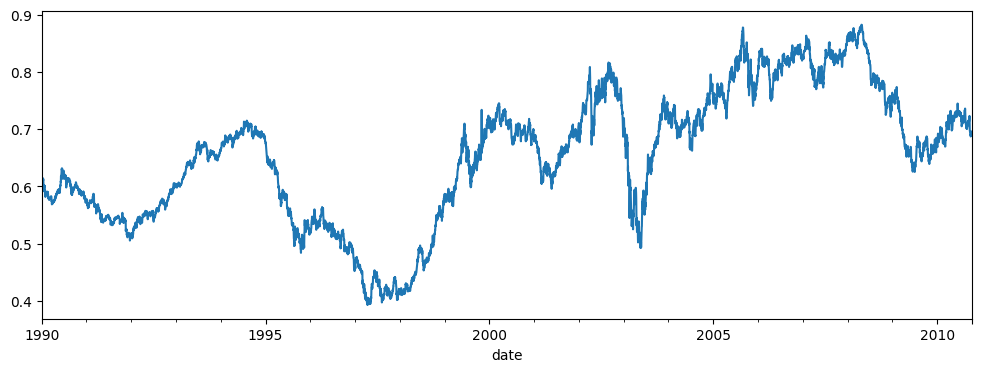

In [30]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [31]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

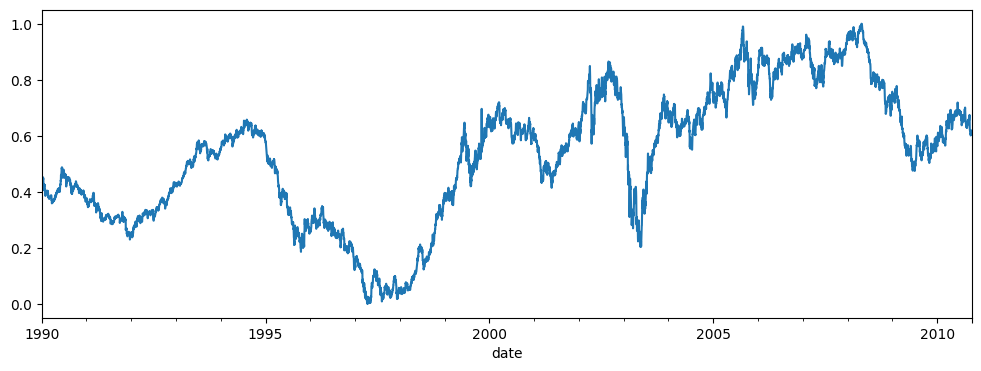

In [32]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [33]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1632617513
Epoch 2, Boundaries delta: 0.0659576082, Codewords delta: 0.0505998237
Epoch 3, Boundaries delta: 0.0461096006, Codewords delta: 0.0381530882
Epoch 4, Boundaries delta: 0.0335306287, Codewords delta: 0.0289872181
Epoch 5, Boundaries delta: 0.0249212491, Codewords delta: 0.0225067315
Epoch 6, Boundaries delta: 0.0191112878, Codewords delta: 0.0180360248
Epoch 7, Boundaries delta: 0.0157092506, Codewords delta: 0.0148580080
Epoch 8, Boundaries delta: 0.0133292920, Codewords delta: 0.0124745366
Epoch 9, Boundaries delta: 0.0116327341, Codewords delta: 0.0111798101
Epoch 10, Boundaries delta: 0.0105636505, Codewords delta: 0.0099690052
Epoch 11, Boundaries delta: 0.0095418894, Codewords delta: 0.0089016309
Epoch 12, Boundaries delta: 0.0086452648, Codewords delta: 0.0079588316
Epoch 13, Boundaries delta: 0.0078625218, Codewords delta: 0.0071868994
Epoch 14, Boundaries delta: 0.0071220643, Codewords delta: 0.0064730370
E

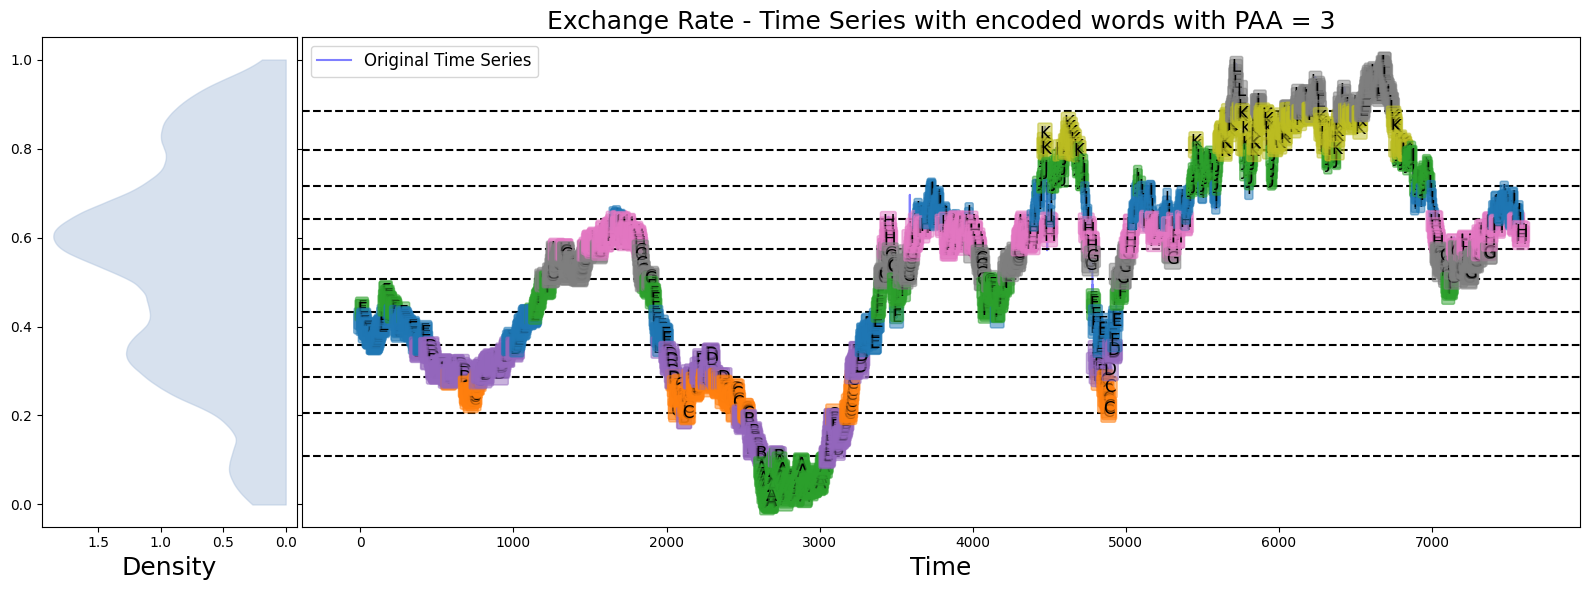

In [34]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=3)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="exchange_rate/exchange_rate_ksax.png", data_name='Exchange Rate')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"exchange_rate/exchange_rate_ksax.csv")

### Stationary

In [35]:
target = etth1['OT']
target = target.diff().dropna()

In [36]:
target.head()

date
1990-01-02    0.0010
1990-01-03    0.0033
1990-01-04   -0.0003
1990-01-05    0.0015
1990-01-06    0.0055
Name: OT, dtype: float64

<Axes: xlabel='date'>

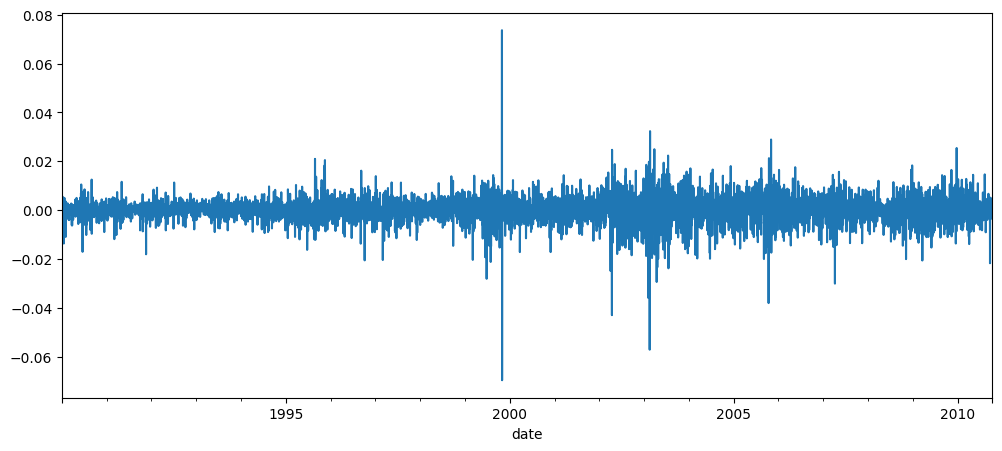

In [37]:
plt.figure(figsize=(12,5))
target.plot()

Epoch 1, Boundaries delta: 0.0273807291, Codewords delta: 0.0228663455
Epoch 2, Boundaries delta: 0.0097302374, Codewords delta: 0.0077355108
Epoch 3, Boundaries delta: 0.0068843073, Codewords delta: 0.0058219938
Epoch 4, Boundaries delta: 0.0051642824, Codewords delta: 0.0044418493
Epoch 5, Boundaries delta: 0.0039071779, Codewords delta: 0.0034388965
Epoch 6, Boundaries delta: 0.0029741163, Codewords delta: 0.0026966048
Epoch 7, Boundaries delta: 0.0023815839, Codewords delta: 0.0021395548
Epoch 8, Boundaries delta: 0.0019423970, Codewords delta: 0.0017477840
Epoch 9, Boundaries delta: 0.0016601041, Codewords delta: 0.0015216735
Epoch 10, Boundaries delta: 0.0014772741, Codewords delta: 0.0013361278
Epoch 11, Boundaries delta: 0.0013235646, Codewords delta: 0.0011823305
Epoch 12, Boundaries delta: 0.0011927876, Codewords delta: 0.0010597698
Epoch 13, Boundaries delta: 0.0010803304, Codewords delta: 0.0009703352
Epoch 14, Boundaries delta: 0.0009826967, Codewords delta: 0.0008910884
E

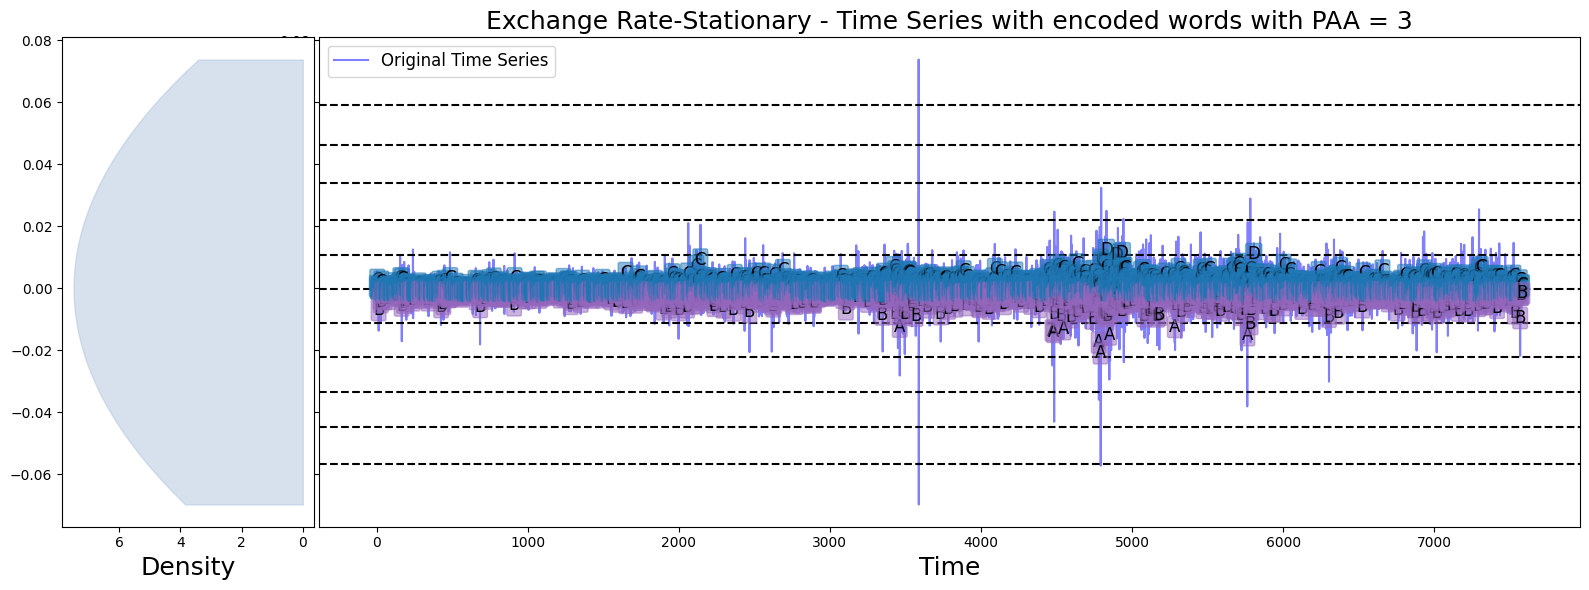

In [38]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=3)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="exchange_rate/exchange_rate_stationary_ksax.png", data_name='Exchange Rate-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"exchange_rate/exchange_rate_stationary_ksax.csv")